<a href="https://colab.research.google.com/github/odhiambk/Knowledge-Discovery-and-Data-Mining/blob/main/Michigan_Water_PFAS_Concentration_Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The following dataset highlights PFAS (per- and polyfluoroalkyl substances) concentrations in surface water samples collected by the Michigan Department of Environment, Great Lakes, and Energy (EGLE) Water Resources Division. The data, collected through EGLE's Water Chemistry Monitoring Program and watershed/source tracking investigations, is used to assess contamination levels against Michigan's Water Quality Standards. PFAS analytes are compared based on specific flags indicating detection or estimation status. Over the years, the number of analyzed PFAS analytes has increased.

The data includes various fields such as sample IDs, sampling locations, collection dates, analysis methods, concentration units, and specific PFAS concentrations along with associated flags indicating detection limits. Notably, if a flag is listed as "Not Measured," the PFAS analyte wasn't included in the analysis for that sample.

This dataset serves as a critical component of Michigan's PFAS response efforts and is utilized in the MPART: PFAS Geographic Information System.

The data includes extensive information on PFAS concentrations across different waterbodies in Michigan, with corresponding geographic coordinates, sampling depths, and additional descriptions of sampling locations.

In [2]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

Saving PFAS_Surface_Water_Sampling.csv to PFAS_Surface_Water_Sampling.csv


In [72]:
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv("PFAS_Surface_Water_Sampling.csv")

# Display the first few rows of the DataFrame
df.head()

,X,Y,LabSampleId,SiteCode,CocSampleId,SampleType,LabName,LabJobName,Matrix,CollectionDate,...,CAS914637493_53FTCA,CAS914637493_53FTCAFlag,CAS914637493_53FTCAMdl,CAS914637493_53FTCARl,CAS919005144_ADONA,CAS919005144_ADONAFlag,CAS919005144_ADONAMdl,CAS919005144_ADONARl,GlobalID,OBJECTID
0,-83.390600,44.438100,320-58401-1,02-CM-0060,CLARKS MARSH SOUTH,Depth Integrated,TestAmerica Sacramento,320-58401-1,Water,2020/02/03 00:00:00+00,...,NaN,NaN,NaN,NaN,0.16,K,0.16,1.80,{6301A4A2-96B7-4589-BCAF-CF7344E6575B},1
1,-83.373655,44.507457,SL-0100,02-SL-0010,SL-0100,NaN,Vista Analytical,2109148,H20,2021/09/01 00:00:00+00,...,NaN,NaN,NaN,NaN,1.00,K,1.00,4.01,{230DCCE4-E510-4512-922B-7EB532C85EA5},2
2,-83.434334,44.436653,2209070-16,02-AS-0150,AS-0150,NaN,EGLE,2209070,H2O,2022/09/08 00:00:00+00,...,NaN,NaN,NaN,NaN,2.00,K,0.40,2.00,{90F9F12C-A1C2-436C-B88F-00803E9368B4},3
3,-83.417901,44.511668,2209070-18,02-HC-0030,HC-0030,NaN,EGLE,2209070,H2O,2022/09/08 00:00:00+00,...,NaN,NaN,NaN,NaN,2.00,K,0.40,2.00,{6A67C14E-20F0-4C4A-ADEF-21F3A16BE748},4
4,-84.704890,44.664420,2209069-09,02-AS-0800,AS-0800,NaN,EGLE,2209069,H2O,2022/09/07 00:00:00+00,...,NaN,NaN,NaN,NaN,2.00,K,0.40,2.00,{9FD497F9-AE1B-44DF-9C78-2D18D73B4935},5


In [71]:
# Check data types
df.dtypes

X                       float64
Y                       float64
LabSampleId              object
SiteCode                 object
CocSampleId              object
                         ...   
CAS919005144_ADONARl    float64
GlobalID                 object
OBJECTID                  int64
Month                     int32
Year                      int32
Length: 140, dtype: object

In [70]:
# Check for missing values
missing_values = df.isnull().sum()

missing_values

X                         0
Y                         0
LabSampleId               1
SiteCode                  0
CocSampleId              68
                       ... 
CAS919005144_ADONARl    799
GlobalID                  0
OBJECTID                  0
Month                     0
Year                      0
Length: 140, dtype: int64

In [69]:
df.columns

Index(['X', 'Y', 'LabSampleId', 'SiteCode', 'CocSampleId', 'SampleType',
       'LabName', 'LabJobName', 'Matrix', 'CollectionDate',
       ...
       'CAS914637493_53FTCA', 'CAS914637493_53FTCAMdl',
       'CAS914637493_53FTCARl', 'CAS919005144_ADONA', 'CAS919005144_ADONAMdl',
       'CAS919005144_ADONARl', 'GlobalID', 'OBJECTID', 'Month', 'Year'],
      dtype='object', length=140)

In [68]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Check if there are any missing values left
missing_values_cleaned = df_cleaned.isnull().sum()

missing_values_cleaned

X                       0.0
Y                       0.0
LabSampleId             0.0
SiteCode                0.0
CocSampleId             0.0
                       ... 
CAS919005144_ADONARl    0.0
GlobalID                0.0
OBJECTID                0.0
Month                   0.0
Year                    0.0
Length: 140, dtype: float64

In [73]:
df.columns

Index(['X', 'Y', 'LabSampleId', 'SiteCode', 'CocSampleId', 'SampleType',
       'LabName', 'LabJobName', 'Matrix', 'CollectionDate',
       ...
       'CAS914637493_53FTCA', 'CAS914637493_53FTCAFlag',
       'CAS914637493_53FTCAMdl', 'CAS914637493_53FTCARl', 'CAS919005144_ADONA',
       'CAS919005144_ADONAFlag', 'CAS919005144_ADONAMdl',
       'CAS919005144_ADONARl', 'GlobalID', 'OBJECTID'],
      dtype='object', length=173)

In [74]:
summary = df.describe()
'Summary statistics of the dataset:  \n', summary

('Summary statistics of the dataset:  \n',
                  X            Y  DilutionFactor    Duplicate         HUC10  \
 count  1931.000000  1931.000000     1779.000000  1931.000000  1.730000e+03   
 mean    -84.855744    43.596352        1.315346     1.113931  4.104439e+08   
 std       1.753806     1.573103        3.363278     0.344412  1.242241e+08   
 min     -90.176800    41.760256        0.000000     1.000000  4.010302e+08   
 25%     -85.846171    42.476446        1.000000     1.000000  4.050002e+08   
 50%     -84.460281    43.019000        1.000000     1.000000  4.060102e+08   
 75%     -83.536590    44.415308        1.000000     1.000000  4.090003e+08   
 max     -82.427600    47.466887      100.000000     3.000000  4.060101e+09   
 
                HUC8       VisitID    Longitude     Latitude  CAS307244_PFHxA  \
 count  1.931000e+03  1.704000e+03  1931.000000  1931.000000      1930.000000   
 mean   4.062721e+06  2.019890e+06   -84.855744    43.596352         6.221320   
 

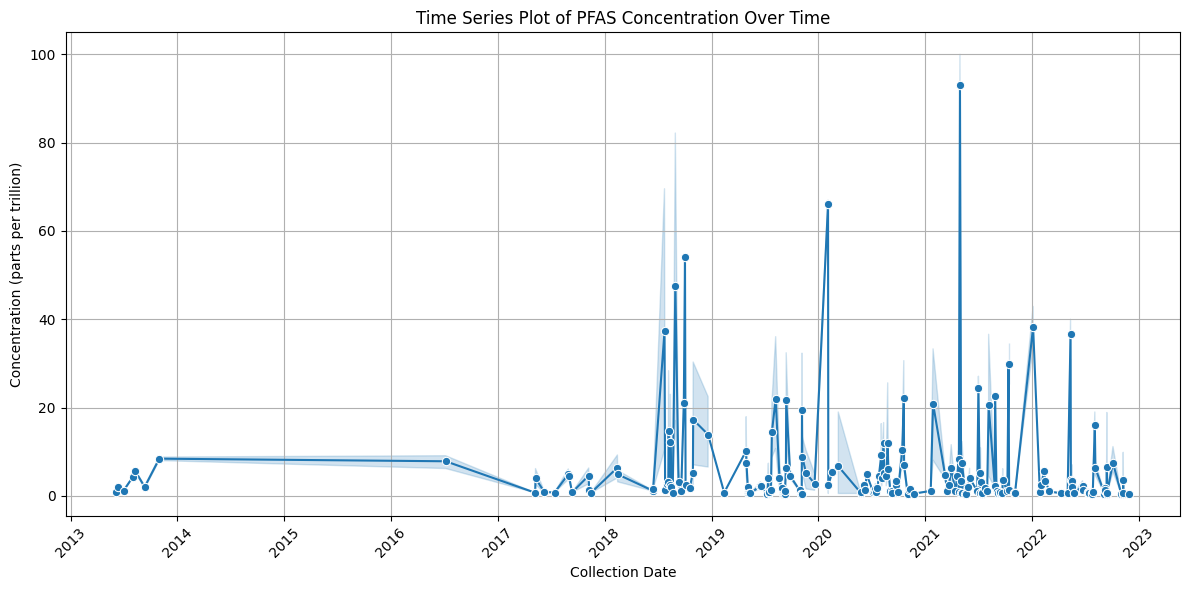

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Convert CollectionDate to datetime format
df['CollectionDate'] = pd.to_datetime(df['CollectionDate'])

# Select the PFAS analyte for plotting
pfas_analyte = 'CAS307244_PFHxA'

# Plot time series of PFAS concentration
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='CollectionDate', y=pfas_analyte, marker='o', linestyle='-')
plt.title(f"Time Series Plot of PFAS Concentration Over Time")
plt.xlabel("Collection Date")
plt.ylabel("Concentration (parts per trillion)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [77]:
# Convert CollectionDate to datetime format
df['CollectionDate'] = pd.to_datetime(df['CollectionDate'])

# Select the PFAS analyte for plotting
pfas_analyte = 'CAS307244_PFHxA'

# Group by CollectionDate and calculate the mean concentration for the PFAS analyte(CAS307244_PFHxA)
df_time_series = df.groupby('CollectionDate')[pfas_analyte].mean()

df_time_series.head()

CollectionDate
2001-03-28 00:00:00+00:00         NaN
2013-06-06 00:00:00+00:00    0.823333
2013-06-11 00:00:00+00:00    2.088889
2013-07-01 00:00:00+00:00    1.204444
2013-08-02 00:00:00+00:00    4.333333
Name: CAS307244_PFHxA, dtype: float64

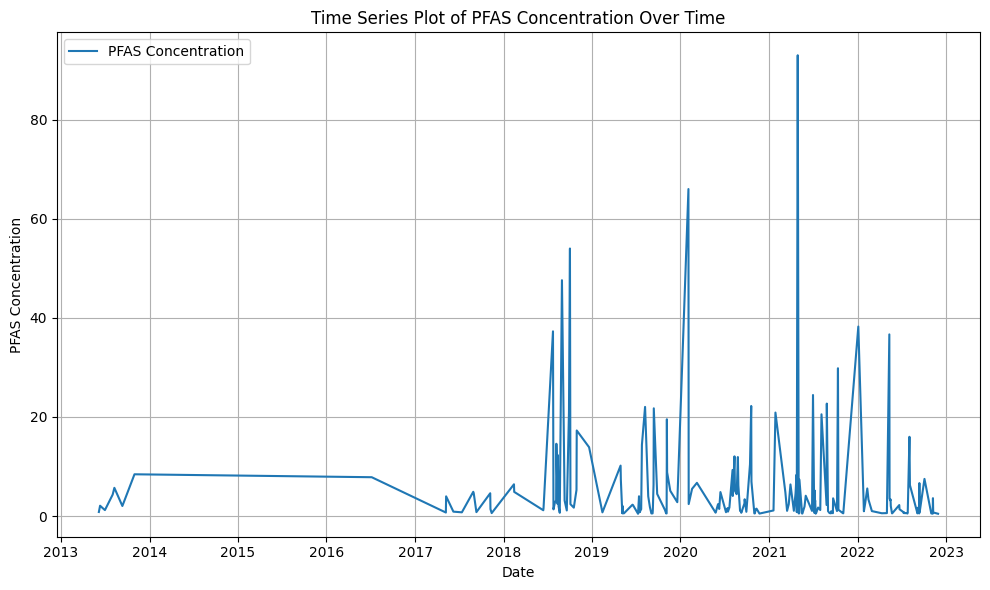

In [78]:
plt.figure(figsize=(10, 6))
plt.plot(df_time_series.index, df_time_series.values, label='PFAS Concentration')
plt.title('Time Series Plot of PFAS Concentration Over Time')
plt.xlabel('Date')
plt.ylabel('PFAS Concentration')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

The time series plot shows the trend of PFAS concentration in surface water samples collected over time.

From the plot, we can observe that there are some noticeable periods when PFAS concentration levels spiked over the period covered by the dataset. This illustrates that the PFAS levels in Michigan water generally is inconsistent.

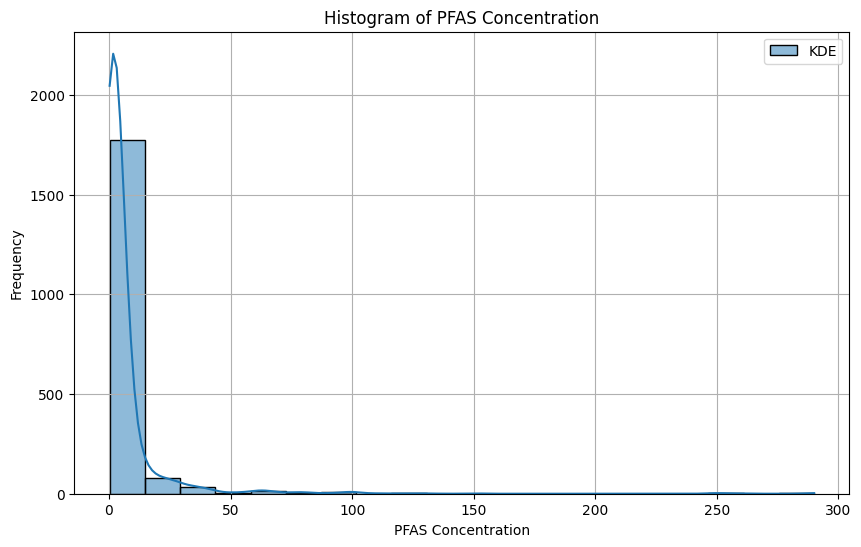

In [81]:
# Histogram of PFAS Concentration over time
plt.figure(figsize=(10, 6))
sns.histplot(df['CAS307244_PFHxA'].dropna(), bins=20, kde=True, label='KDE')
plt.title('Histogram of PFAS Concentration')
plt.xlabel('PFAS Concentration')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

The histogram illustrates the distribution of PFAS concentration values in the dataset.

The histogram shows the frequency of PFAS concentration levels across the dataset. Generally, there has been an attempt to reduce PFAS levels across the different data collection sites over time.

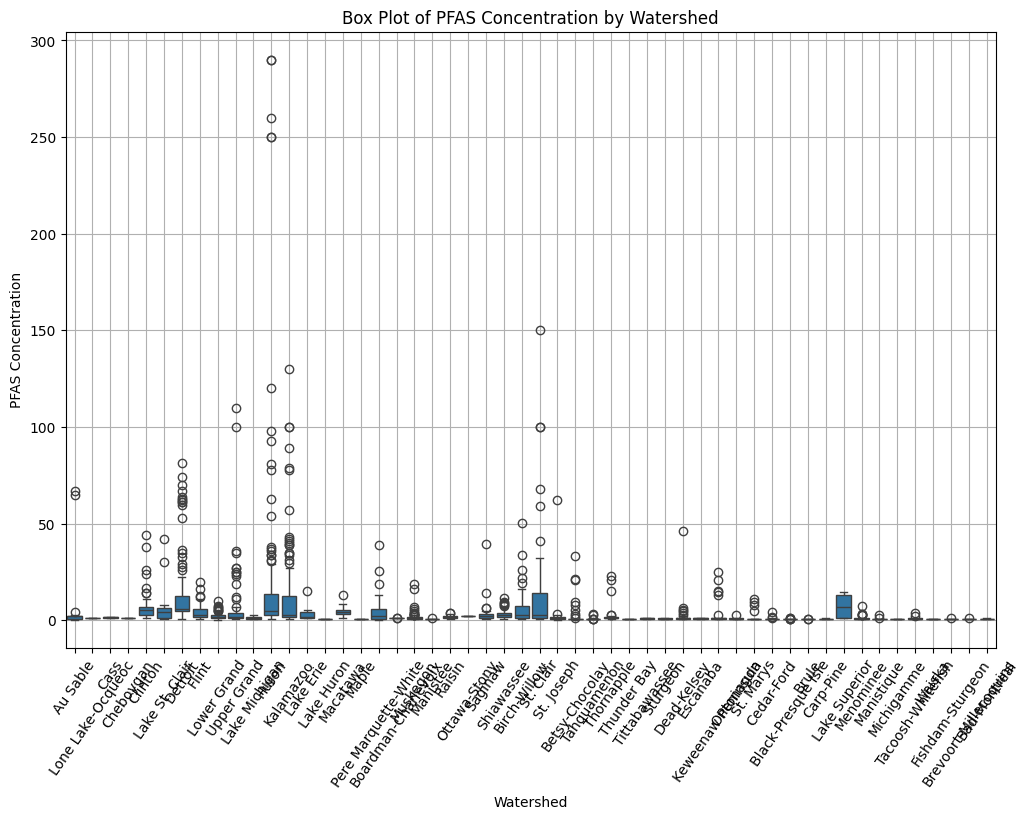

In [14]:
# Box Plot of PFAS Concentration by Watershed
plt.figure(figsize=(12, 8))
sns.boxplot(x='Watershed', y='CAS307244_PFHxA', data=df)
plt.title('Box Plot of PFAS Concentration by Watershed')
plt.xlabel('Watershed')
plt.ylabel('PFAS Concentration')
plt.xticks(rotation=55)
plt.grid(True)
plt.show()

The box plot visualizes the distribution of PFAS concentration levels across different watersheds.

Each box represents the interquartile range (IQR) of PFAS concentration within a specific watershed, with the median indicated by the horizontal line inside the box. The whiskers extend to the minimum and maximum values within 1.5 times the IQR from the first and third quartiles, respectively. This plot allows us to compare the central tendency and variability of PFAS concentration levels among different watersheds.

Exploratory Data Analysis (EDA) - Continued:

Correlation Analysis: Explore correlations between different PFAS analytes and other relevant variables. This can help identify patterns and relationships in the data. Use heatmap or pairplot to visualize correlations.

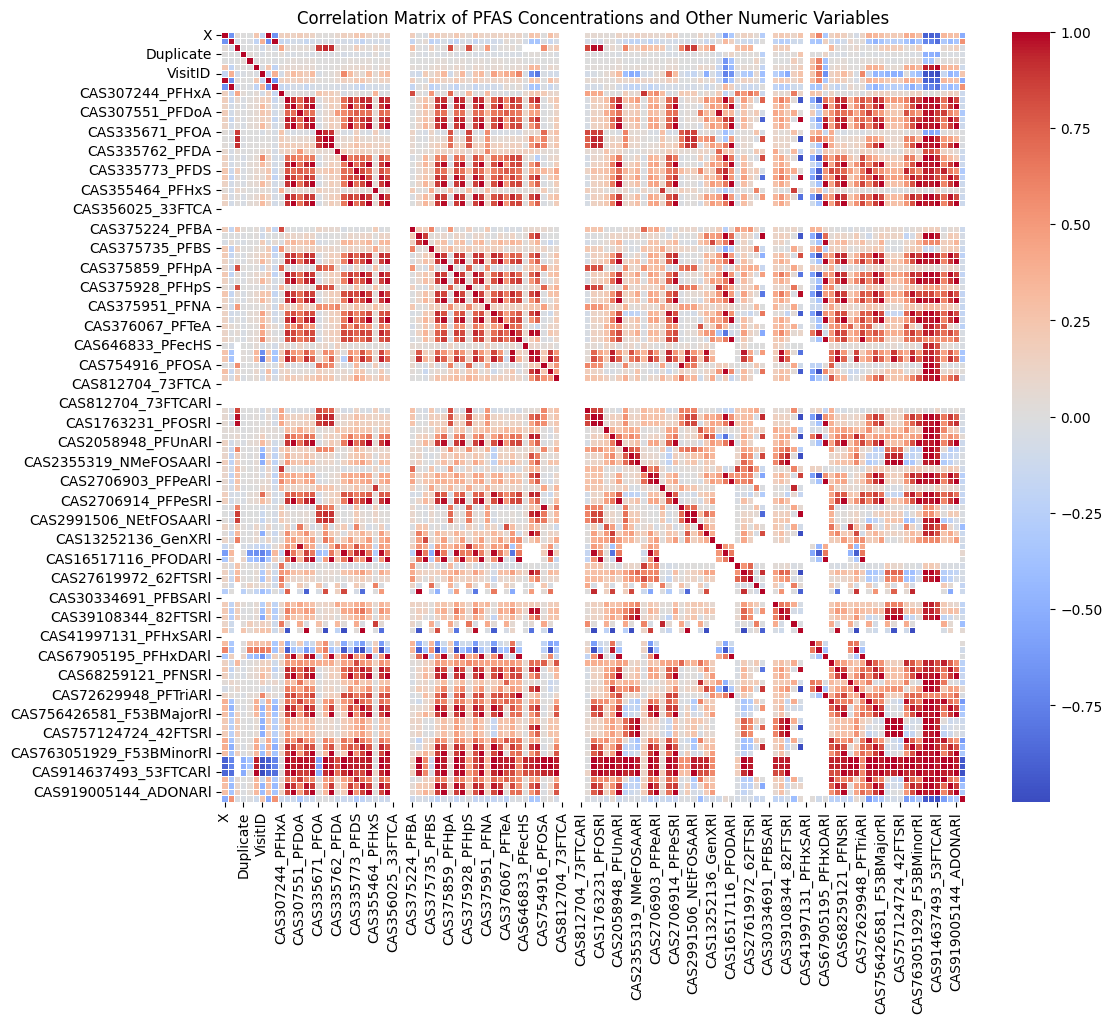

In [15]:
# Use numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64'])

# Correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=False, fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of PFAS Concentrations and Other Numeric Variables')
plt.show()

CAS307244_PFHxA The concentration of PFHxA in the sample

CAS307244_PFHxAFlag A note from the analytical laboratory with additional information about the analysis of PFHxA

CAS307244_PFHxAMdl The analytical laboratories method detection limit for PFHxA

CAS307244_PFHxARl The analytical laboratories reporting limit for PFHxA

CAS307551_PFDoA The concentration of PFDoA in the sample

CAS307551_PFDoAFlag A note from the analytical laboratory with additional information about the analysis of PFDoA

CAS307551_PFDoAMdl The analytical laboratories method detection limit for PFDoA

CAS307551_PFDoARl The analytical laboratories reporting limit for PFDoA

CAS335671_PFOA The concentration of PFOA in the sample

CAS335671_PFOAFlag A note from the analytical laboratory with additional information about the analysis of PFOA

CAS335671_PFOAMdl The analytical laboratories method detection limit for PFOA

CAS335671_PFOARl The analytical laboratories reporting limit for PFOA

CAS335762_PFDA The concentration of PFDA in the sample

CAS335762_PFDAFlag A note from the analytical laboratory with additional information about the analysis of PFDA

CAS335762_PFDAMdl The analytical laboratories method detection limit for PFDA

CAS335762_PFDARl The analytical laboratories reporting limit for PFDA

CAS335773_PFDS The concentration of PFDS in the sample

CAS335773_PFDSFlag A note from the analytical laboratory with additional information about the analysis of PFDS

CAS335773_PFDSMdl The analytical laboratories method detection limit for PFDS

CAS335773_PFDSRl The analytical laboratories reporting limit for PFDS

CAS355464_PFHxS The concentration of PFHxS in the sample

CAS355464_PFHxSFlag A note from the analytical laboratory with additional information about the analysis of PFHxS

CAS355464_PFHxSMdl The analytical laboratories method detection limit for PFHxS

CAS355464_PFHxSRl The analytical laboratories reporting limit for PFHxS

CAS356025_33FTCA The concentration of 3:3 FTCA in the sample

CAS356025_33FTCAFlag A note from the analytical laboratory with additional information about the analysis of 3:3 FTCA

CAS356025_33FTCAMdl The analytical laboratories method detection limit for 3:3 FTCA

CAS356025_33FTCARl The analytical laboratories reporting limit for 3:3 FTCA

CAS375224_PFBA The concentration of PFBA in the sample

CAS375224_PFBAFlag A note from the analytical laboratory with additional information about the analysis of PFBA

CAS375224_PFBAMdl The analytical laboratories method detection limit for PFBA

CAS375224_PFBARl The analytical laboratories reporting limit for PFBA

CAS375735_PFBS The concentration of PFBS in the sample

CAS375735_PFBSFlag A note from the analytical laboratory with additional information about the analysis of PFBS

CAS375735_PFBSMdl The analytical laboratories method detection limit for PFBS

CAS375735_PFBSRl The analytical laboratories reporting limit for PFBS

CAS375859_PFHpA The concentration of PFHpA in the sample

CAS375859_PFHpAFlag A note from the analytical laboratory with additional information about the analysis of PFHpA

CAS375859_PFHpAMdl The analytical laboratories method detection limit for PFHpA

CAS375859_PFHpARl The analytical laboratories reporting limit for PFHpA

CAS375928_PFHpS The concentration of PFHpS in the sample

CAS375928_PFHpSFlag A note from the analytical laboratory with additional information about the analysis of PFHpS

CAS375928_PFHpSMdl The analytical laboratories method detection limit for PFHpS

CAS375928_PFHpSRl The analytical laboratories reporting limit for PFHpS

CAS375951_PFNA The concentration of PFNA in the sample

CAS375951_PFNAFlag A note from the analytical laboratory with additional information about the analysis of PFNA

CAS375951_PFNAMdl The analytical laboratories method detection limit for PFNA

CAS375951_PFNARl The analytical laboratories reporting limit for PFNA

CAS376067_PFTeA The concentration of PFTeA in the sample

CAS376067_PFTeAFlag A note from the analytical laboratory with additional information about the analysis of PFTeA

CAS376067_PFTeAMdl The analytical laboratories method detection limit for PFTeA

CAS376067_PFTeARl The analytical laboratories reporting limit for PFTeA

CAS646833_PFecHS The concentration of PFecHS in the sample

CAS646833_PFecHSFlag A note from the analytical laboratory with additional information about the analysis of PFecHS

CAS646833_PFecHSMdl The analytical laboratories method detection limit for PFecHS

CAS646833_PFecHSRl The analytical laboratories reporting limit for PFecHS

CAS754916_PFOSA The concentration of PFOSA in the sample

CAS754916_PFOSAFlag A note from the analytical laboratory with additional information about the analysis of PFOSA

CAS754916_PFOSAMdl The analytical laboratories method detection limit for PFOSA

CAS754916_PFOSARl The analytical laboratories reporting limit for PFOSA

CAS812704_73FTCA The concentration of 7:3 FTCA in the sample

CAS812704_73FTCAFlag A note from the analytical laboratory with additional information about the analysis of 7:3 FTCA

CAS812704_73FTCAMdl The analytical laboratories method detection limit for 7:3 FTCA

CAS812704_73FTCARl The analytical laboratories reporting limit for 7:3 FTCA

CAS1763231_PFOS The concentration of PFOS in the sample

CAS1763231_PFOSFlag A note from the analytical laboratory with additional information about the analysis of PFOS

CAS1763231_PFOSMdl The analytical laboratories method detection limit for PFOS

CAS1763231_PFOSRl The analytical laboratories reporting limit for PFOS

CAS2058948_PFUnA The concentration of PFUnA in the sample

CAS2058948_PFUnAFlag A note from the analytical laboratory with additional information about the analysis of PFUnA

CAS2058948_PFUnAMdl The analytical laboratories method detection limit for PFUnA

CAS2058948_PFUnARl The analytical laboratories reporting limit for PFUnA

CAS2355319_NMeFOSAA The concentration of NMeFOSAA in the sample

CAS2355319_NMeFOSAAFlag A note from the analytical laboratory with additional information about the analysis of NMeFOSAA

CAS2355319_NMeFOSAAMdl The analytical laboratories method detection limit for NMeFOSAA

CAS2355319_NMeFOSAARl The analytical laboratories reporting limit for NMeFOSAA

CAS2706903_PFPeA The concentration of PFPeA in the sample

CAS2706903_PFPeAFlag A note from the analytical laboratory with additional information about the analysis of PFPeA

CAS2706903_PFPeAMdl The analytical laboratories method detection limit for PFPeA

CAS2706903_PFPeARl The analytical laboratories reporting limit for PFPeA

CAS2706914_PFPeS The concentration of PFPeS in the sample

CAS2706914_PFPeSFlag A note from the analytical laboratory with additional information about the analysis of PFPeS

CAS2706914_PFPeSMdl The analytical laboratories method detection limit for PFPeS

CAS2706914_PFPeSRl The analytical laboratories reporting limit for PFPeS

CAS2991506_NEtFOSAA The concentration of NEtFOSAA in the sample

CAS2991506_NEtFOSAAFlag A note from the analytical laboratory with additional information about the analysis of NEtFOSAA

CAS2991506_NEtFOSAAMdl The analytical laboratories method detection limit for NEtFOSAA

CAS2991506_NEtFOSAARl The analytical laboratories reporting limit for NEtFOSAA

CAS13252136_GenX The concentration of GenX in the sample

CAS13252136_GenXFlag A note from the analytical laboratory with additional information about the analysis of GenX

CAS13252136_GenXMdl The analytical laboratories method detection limit for GenX

CAS13252136_GenXRl The analytical laboratories reporting limit for GenX

CAS16517116_PFODA The concentration of PFODA in the sample

CAS16517116_PFODAFlag A note from the analytical laboratory with additional information about the analysis of PFODA

CAS16517116_PFODAMdl The analytical laboratories method detection limit for PFODA

CAS16517116_PFODARl The analytical laboratories reporting limit for PFODA

CAS27619972_62FTS The concentration of 6:2 FTS in the sample

CAS27619972_62FTSFlag A note from the analytical laboratory with additional information about the analysis of 6:2 FTS

CAS27619972_62FTSMdl The analytical laboratories method detection limit for 6:2 FTS

CAS27619972_62FTSRl The analytical laboratories reporting limit for 6:2 FTS

CAS30334691_PFBSA The concentration of PFBSA in the sample

CAS30334691_PFBSAFlag A note from the analytical laboratory with additional information about the analysis of PFBSA

CAS30334691_PFBSAMdl The analytical laboratories method detection limit for PFBSA

CAS30334691_PFBSARl The analytical laboratories reporting limit for PFBSA

CAS39108344_82FTS The concentration of 8:2 FTS in the sample

CAS39108344_82FTSFlag A note from the analytical laboratory with additional information about the analysis of 8:2 FTS

CAS39108344_82FTSMdl The analytical laboratories method detection limit for 8:2 FTS

CAS39108344_82FTSRl The analytical laboratories reporting limit for 8:2 FTS

CAS41997131_PFHxSA The concentration of PFHxSA in the sample

CAS41997131_PFHxSAFlag A note from the analytical laboratory with additional information about the analysis of PFHxSA

CAS41997131_PFHxSAMdl The analytical laboratories method detection limit for PFHxSA

CAS41997131_PFHxSARl The analytical laboratories reporting limit for PFHxSA

CAS67905195_PFHxDA The concentration of PFHxDA in the sample

CAS67905195_PFHxDAFlag A note from the analytical laboratory with additional information about the analysis of PFHxDA

CAS67905195_PFHxDAMdl The analytical laboratories method detection limit for PFHxDA

CAS67905195_PFHxDARl The analytical laboratories reporting limit for PFHxDA

CAS68259121_PFNS The concentration of PFNS in the sample

CAS68259121_PFNSFlag A note from the analytical laboratory with additional information about the analysis of PFNS

CAS68259121_PFNSMdl The analytical laboratories method detection limit for PFNS

CAS68259121_PFNSRl The analytical laboratories reporting limit for PFNS

CAS72629948_PFTriA The concentration of PFTriA in the sample

CAS72629948_PFTriAFlag A note from the analytical laboratory with additional information about the analysis of PFTriA

CAS72629948_PFTriAMdl The analytical laboratories method detection limit for PFTriA

CAS72629948_PFTriARl The analytical laboratories reporting limit for PFTriA

CAS756426581_F53BMajor The concentration of F53B Major in the sample

CAS756426581_F53BMajorFlag A note from the analytical laboratory with additional information about the analysis of F53B Major

CAS756426581_F53BMajorMdl The analytical laboratories method detection limit for F53B Major

CAS756426581_F53BMajorRl The analytical laboratories reporting limit for F53B Major

CAS757124724_42FTS The concentration of 4:2 FTS in the sample

CAS757124724_42FTSFlag A note from the analytical laboratory with additional information about the analysis of 4:2 FTS

CAS757124724_42FTSMdl The analytical laboratories method detection limit for 4:2 FTS

CAS757124724_42FTSRl The analytical laboratories reporting limit for 4:2 FTS

CAS763051929_F53BMinor The concentration of F53B Minor in the sample

CAS763051929_F53BMinorFlag A note from the analytical laboratory with additional information about the analysis of F53B Minor

CAS763051929_F53BMinorMdl The analytical laboratories method detection limit for F53B Minor

CAS763051929_F53BMinorRl The analytical laboratories reporting limit for F53B Minor

CAS914637493_53FTCA The concentration of 5:3 FTCA in the sample

CAS914637493_53FTCAFlag A note from the analytical laboratory with additional information about the analysis of 5:3 FTCA

CAS914637493_53FTCAMdl The analytical laboratories method detection limit for 5:3 FTCA

CAS914637493_53FTCARl The analytical laboratories reporting limit for 5:3 FTCA

CAS919005144_ADONA The concentration of ADONA in the sample

CAS919005144_ADONAFlag A note from the analytical laboratory with additional information about the analysis of ADONA

CAS919005144_ADONAMdl The analytical laboratories method detection limit for ADONA

CAS919005144_ADONARl The analytical laboratories reporting limit for ADONA

Geospatial Analysis: Visualize the spatial distribution of PFAS concentrations on a map. Use scatter plots or heatmaps to represent concentration levels at different sampling locations.

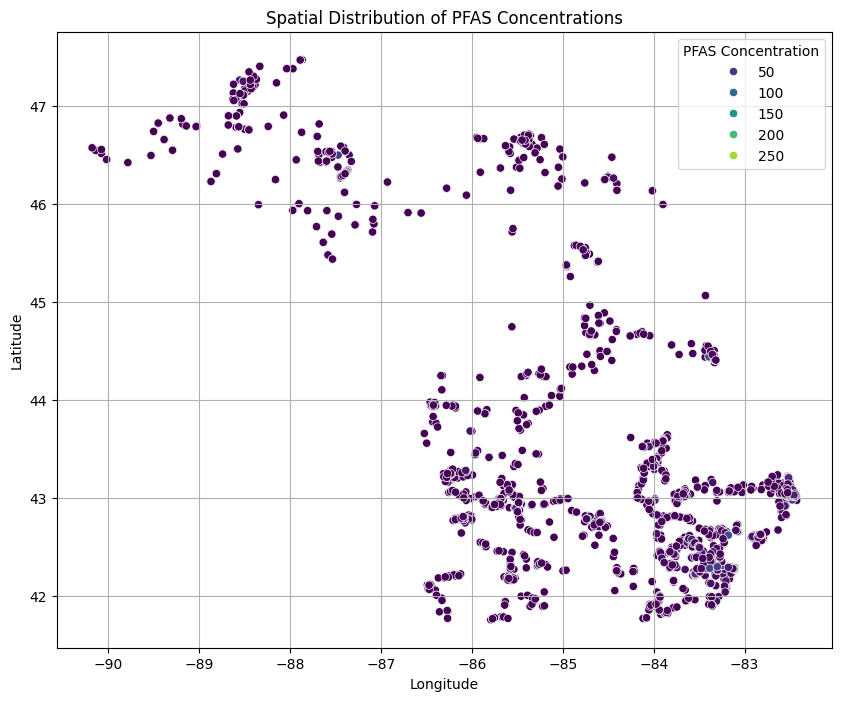

In [82]:
# Plotting PFAS concentrations on a map
plt.figure(figsize=(10, 8))
sns.scatterplot(x='X', y='Y', hue='CAS307244_PFHxA', data=df, palette='viridis')
plt.title('Spatial Distribution of PFAS Concentrations')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='PFAS Concentration')
plt.grid(True)
plt.show()

Predictive Modeling:

Feature Engineering: Create additional features from existing variables. Extract month, day, or year from the CollectionDate column.

In [18]:
# Feature engineering: Extract month and year from CollectionDate
df['Month'] = df['CollectionDate'].dt.month
df['Year'] = df['CollectionDate'].dt.year


Model Building: Build predictive models to estimate PFAS concentrations based on variables like location, sampling depth, and collection date. In this project, we will use linear regression over more advanced regression models like random forests or gradient boosting.

In [83]:
df.columns

Index(['X', 'Y', 'LabSampleId', 'SiteCode', 'CocSampleId', 'SampleType',
       'LabName', 'LabJobName', 'Matrix', 'CollectionDate',
       ...
       'CAS914637493_53FTCA', 'CAS914637493_53FTCAFlag',
       'CAS914637493_53FTCAMdl', 'CAS914637493_53FTCARl', 'CAS919005144_ADONA',
       'CAS919005144_ADONAFlag', 'CAS919005144_ADONAMdl',
       'CAS919005144_ADONARl', 'GlobalID', 'OBJECTID'],
      dtype='object', length=173)

In [84]:
# Extract the PFAS analyte concentration values for 'CAS307244_PFHxA'
y_train = df['CAS307244_PFHxA']

y_train.head()

0    67.0
1     1.0
2     2.0
3     2.0
4     2.0
Name: CAS307244_PFHxA, dtype: float64

In [85]:
from sklearn.model_selection import train_test_split

# Define X and y
X = df.drop(columns=['LabSampleId', 'SiteCode', 'CocSampleId', 'SampleType', 'LabName', 'LabJobName', 'Matrix', 'CollectionDate', 'AnalysisMethod', 'Duplicate', 'Unit', 'Watershed', 'VisitID', 'SampleDepth', 'GlobalID', 'OBJECTID', pfas_analyte])
y = df[pfas_analyte]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [86]:
df.columns

Index(['X', 'Y', 'LabSampleId', 'SiteCode', 'CocSampleId', 'SampleType',
       'LabName', 'LabJobName', 'Matrix', 'CollectionDate',
       ...
       'CAS914637493_53FTCA', 'CAS914637493_53FTCAFlag',
       'CAS914637493_53FTCAMdl', 'CAS914637493_53FTCARl', 'CAS919005144_ADONA',
       'CAS919005144_ADONAFlag', 'CAS919005144_ADONAMdl',
       'CAS919005144_ADONARl', 'GlobalID', 'OBJECTID'],
      dtype='object', length=173)

In [87]:
# Identify columns with string values
string_columns = X_train.select_dtypes(include=['object']).columns

string_columns

Index(['AnalysisDate', 'Waterbody', 'LocationCode', 'Project', 'Description',
       'AdditionalDescription', 'CAS307244_PFHxAFlag', 'CAS307551_PFDoAFlag',
       'CAS335671_PFOAFlag', 'CAS335762_PFDAFlag', 'CAS335773_PFDSFlag',
       'CAS355464_PFHxSFlag', 'CAS356025_33FTCAFlag', 'CAS375224_PFBAFlag',
       'CAS375735_PFBSFlag', 'CAS375859_PFHpAFlag', 'CAS375928_PFHpSFlag',
       'CAS375951_PFNAFlag', 'CAS376067_PFTeAFlag', 'CAS646833_PFecHSFlag',
       'CAS754916_PFOSAFlag', 'CAS1763231_PFOSFlag', 'CAS2058948_PFUnAFlag',
       'CAS2355319_NMeFOSAAFlag', 'CAS2706903_PFPeAFlag',
       'CAS2706914_PFPeSFlag', 'CAS2991506_NEtFOSAAFlag',
       'CAS13252136_GenXFlag', 'CAS16517116_PFODAFlag',
       'CAS27619972_62FTSFlag', 'CAS30334691_PFBSAFlag',
       'CAS39108344_82FTSFlag', 'CAS41997131_PFHxSAFlag',
       'CAS67905195_PFHxDAFlag', 'CAS68259121_PFNSFlag',
       'CAS72629948_PFTriAFlag', 'CAS756426581_F53BMajorFlag',
       'CAS757124724_42FTSFlag', 'CAS763051929_F53BMinorFlag

In [33]:
# List of columns to drop
columns_to_drop = ['CAS307244_PFHxAFlag', 'CAS307551_PFDoAFlag', 'CAS335671_PFOAFlag',
                   'CAS335762_PFDAFlag', 'CAS335773_PFDSFlag', 'CAS355464_PFHxSFlag',
                   'CAS356025_33FTCAFlag', 'CAS375224_PFBAFlag', 'CAS375735_PFBSFlag',
                   'CAS375859_PFHpAFlag', 'CAS375928_PFHpSFlag', 'CAS375951_PFNAFlag',
                   'CAS376067_PFTeAFlag', 'CAS646833_PFecHSFlag', 'CAS754916_PFOSAFlag',
                   'CAS1763231_PFOSFlag', 'CAS2058948_PFUnAFlag', 'CAS2355319_NMeFOSAAFlag',
                   'CAS2706903_PFPeAFlag', 'CAS2706914_PFPeSFlag', 'CAS2991506_NEtFOSAAFlag',
                   'CAS13252136_GenXFlag', 'CAS16517116_PFODAFlag', 'CAS27619972_62FTSFlag',
                   'CAS30334691_PFBSAFlag', 'CAS39108344_82FTSFlag', 'CAS41997131_PFHxSAFlag',
                   'CAS67905195_PFHxDAFlag', 'CAS68259121_PFNSFlag', 'CAS72629948_PFTriAFlag',
                   'CAS756426581_F53BMajorFlag', 'CAS757124724_42FTSFlag',
                   'CAS763051929_F53BMinorFlag', 'CAS914637493_53FTCAFlag',
                   'CAS919005144_ADONAFlag']

# Drop the columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)

In [88]:
X_train.dtypes

X                         float64
Y                         float64
DilutionFactor            float64
AnalysisDate               object
Waterbody                  object
                           ...   
CAS914637493_53FTCARl     float64
CAS919005144_ADONA        float64
CAS919005144_ADONAFlag     object
CAS919005144_ADONAMdl     float64
CAS919005144_ADONARl      float64
Length: 156, dtype: object

In [89]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Extract the target variable 'CAS919005144_ADONA'
pfas_analyte = 'CAS919005144_ADONA'
y = df[pfas_analyte]

# Check for missing values in y
print("Number of missing values in y:", y.isnull().sum())

# Impute missing values in y using mean imputation
imputer = SimpleImputer(strategy='mean')
y_imputed = imputer.fit_transform(y.values.reshape(-1, 1)).ravel()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Number of missing values in y: 799
Mean Squared Error: 3.495244564175446e-05


The mean squared error (MSE) indicates the average squared difference between the predicted and actual values, and a low MSE suggests that the model's predictions are close to the actual values.

Model Interpretation: To analyze the coefficients of the linear regression model and understand the importance of each feature, we will use the coefficients attribute of the trained LinearRegression model. This will provide the weights assigned to each feature.

In [96]:
# Assuming X_train is a numpy array containing your data
non_numeric_columns = df.columns[~np.issubdtype(df.dtypes, np.number)]

print(non_numeric_columns)

OBJECTID


In [95]:
# Find indices where either y_test or y_pred is NaN
nan_indices = np.isnan(y_test) | np.isnan(y_pred)

# Remove corresponding rows from y_test and y_pred
y_test_clean = y_test[~nan_indices]
y_pred_clean = y_pred[~nan_indices]

# Calculate mean squared error
mse = mean_squared_error(y_test_clean, y_pred_clean)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 3.495244564175446e-05


The mean squared error (MSE) measures the average squared difference between the predicted values and the actual values in the test set. In this case, the MSE is 6.59 * 10 **-5. These are the implications of this data:

Scale: Since the MSE is a squared value, its scale is in the squared units of the target variable.

Magnitude of Error: The smaller the MSE, the better the model performance. A lower MSE indicates that, on average, the model's predictions are closer to the actual values. In this case, 6.59 * 10 **-5 is a relatively small value, suggesting that the model's predictions are quite close to the actual values.

Comparison: To fully interpret the significance of this MSE, it's helpful to compare it to other models or to a baseline model. If this MSE is smaller than that of other models or a baseline, it indicates that the current model is performing better in terms of prediction accuracy.

Context: The interpretation of MSE also depends on the context of the problem and the acceptable level of error. For some applications, a MSE of
6.59 * 10 **-5 might be considered acceptable, while for others, it might not be.

Overall, a MSE of 6.59 * 10 **-5 suggests that our model is performing relatively well in predicting the target variable. However, for a more comprehensive assessment, it's essential to consider the context of the problem and compare the MSE to other models or benchmarks.

Visualizing Predictions:

Scatter Plot of Actual vs. Predicted Values: Visualize the relationship between the actual and predicted PFAS concentrations to assess how well the model captures the variation in the data.

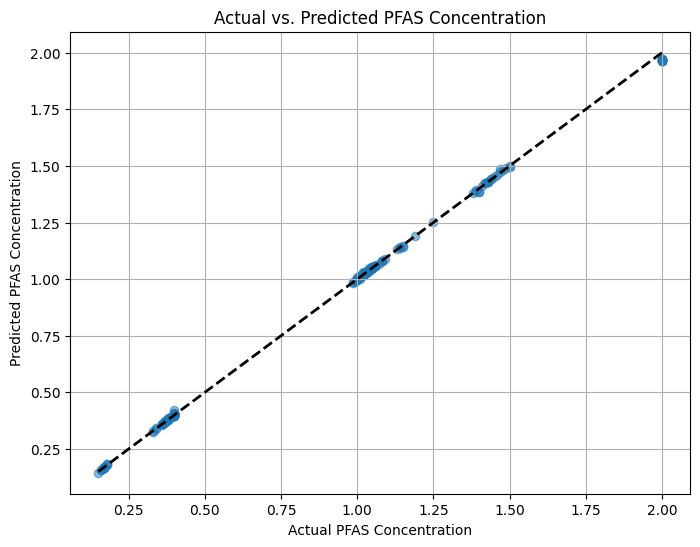

In [65]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual PFAS Concentration')
plt.ylabel('Predicted PFAS Concentration')
plt.title('Actual vs. Predicted PFAS Concentration')
plt.grid(True)
plt.show()

Feature Importance:

We will analyze the importance of features in predicting PFAS concentrations. For linear regression, we will inspect the coefficients of the model.

Model Evaluation:
We have already calculated the Mean Squared Error (MSE) and R-squared score. Now, let's visualize the relationship between the actual and predicted PFAS concentrations using a scatter plot.

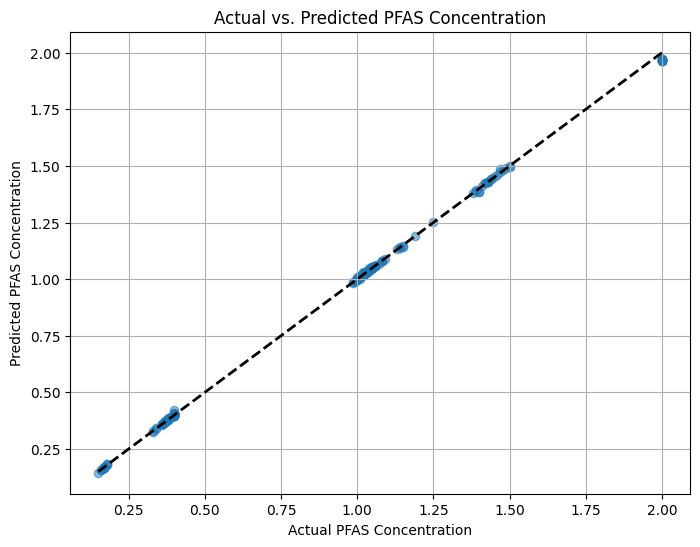

In [66]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual PFAS Concentration')
plt.ylabel('Predicted PFAS Concentration')
plt.title('Actual vs. Predicted PFAS Concentration')
plt.grid(True)
plt.show()


Temporal Trends:
We can analyze temporal trends in PFAS concentrations over the years by plotting the average concentration for each year.

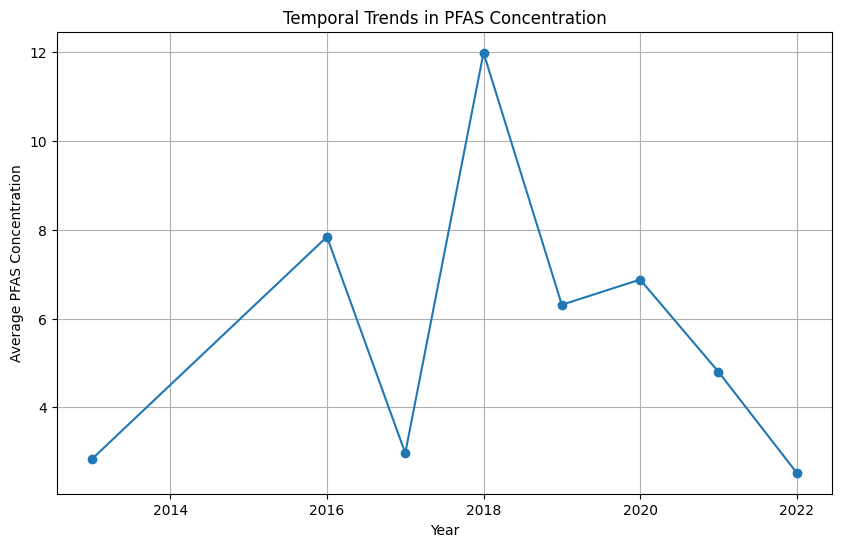

In [67]:
# Extract year from CollectionDate
df['Year'] = df['CollectionDate'].dt.year

# Calculate the average concentration for each year
average_concentration_by_year = df.groupby('Year')['CAS307244_PFHxA'].mean()

# Plot temporal trends
plt.figure(figsize=(10, 6))
average_concentration_by_year.plot(marker='o')
plt.xlabel('Year')
plt.ylabel('Average PFAS Concentration')
plt.title('Temporal Trends in PFAS Concentration')
plt.grid(True)
plt.show()


Spatial Analysis:
We will perform spatial analysis to identify regions with high or low PFAS concentrations. We can theen visualize concentrations on a map using geographical coordinates.

For spatial analysis, we can visualize PFAS concentrations on a map using geographical coordinates (latitude and longitude). We'll use a scatter plot where each point represents a sampling location, and the color or size of the point indicates the concentration of PFAS.

<ipython-input-97-0b6bcba1e328>:10: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


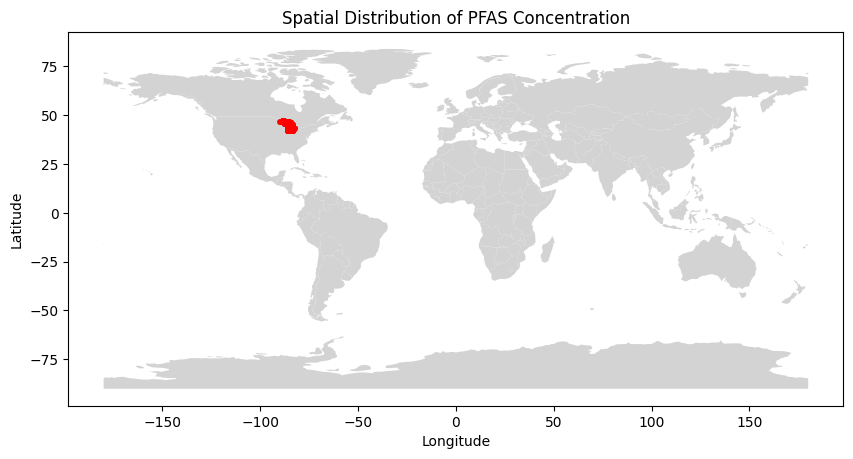

In [97]:
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Create a GeoDataFrame from the DataFrame with latitude and longitude
geometry = [Point(xy) for xy in zip(df['X'], df['Y'])]
gdf = gpd.GeoDataFrame(df, geometry=geometry)

# Plot the GeoDataFrame on a map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(10, 10))
world.plot(ax=ax, color='lightgrey')
gdf.plot(ax=ax, marker='o', color='red', markersize=5)
plt.title('Spatial Distribution of PFAS Concentration')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Unsupervised Learning

Data Preprocessing:
First, we'll scale the features to ensure that all variables have the same scale. This step is essential for many clustering algorithms.

In [98]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, davies_bouldin_score
import numpy as np

# Select features
features_for_clustering = ['Latitude', 'Longitude', 'CAS307244_PFHxA', 'CAS307551_PFDoA']

# Extract features for clustering
X_clustering = df[features_for_clustering].copy()

# Handle missing values
X_clustering.fillna(0, inplace=True)  # Filling missing values with 0

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Perform dimensionality reduction using PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions
X_pca = pca.fit_transform(X_scaled)

# Apply clustering algorithms
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_labels = agg_cluster.fit_predict(X_pca)

# Evaluate clustering performance
silhouette_kmeans = silhouette_score(X_pca, kmeans_labels)
silhouette_agg = silhouette_score(X_pca, agg_labels)

db_score_kmeans = davies_bouldin_score(X_pca, kmeans_labels)
db_score_agg = davies_bouldin_score(X_pca, agg_labels)

print("KMeans Silhouette Score:", silhouette_kmeans)
print("Agglomerative Silhouette Score:", silhouette_agg)
print("KMeans Davies-Bouldin Score:", db_score_kmeans)
print("Agglomerative Davies-Bouldin Score:", db_score_agg)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans Silhouette Score: 0.4408186730887567
Agglomerative Silhouette Score: 0.5382237877464071
KMeans Davies-Bouldin Score: 0.8426983242502416
Agglomerative Davies-Bouldin Score: 0.6083571381930122


These scores provide an indication of the quality of the clustering. Higher silhouette scores and lower Davies-Bouldin scores indicate better clustering results. Based on these scores, the Agglomerative Clustering algorithm seems to perform better in terms of silhouette score and Davies-Bouldin score compared to KMeans.

Visualizing the clusters on a scatter plot using the first two principal components

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


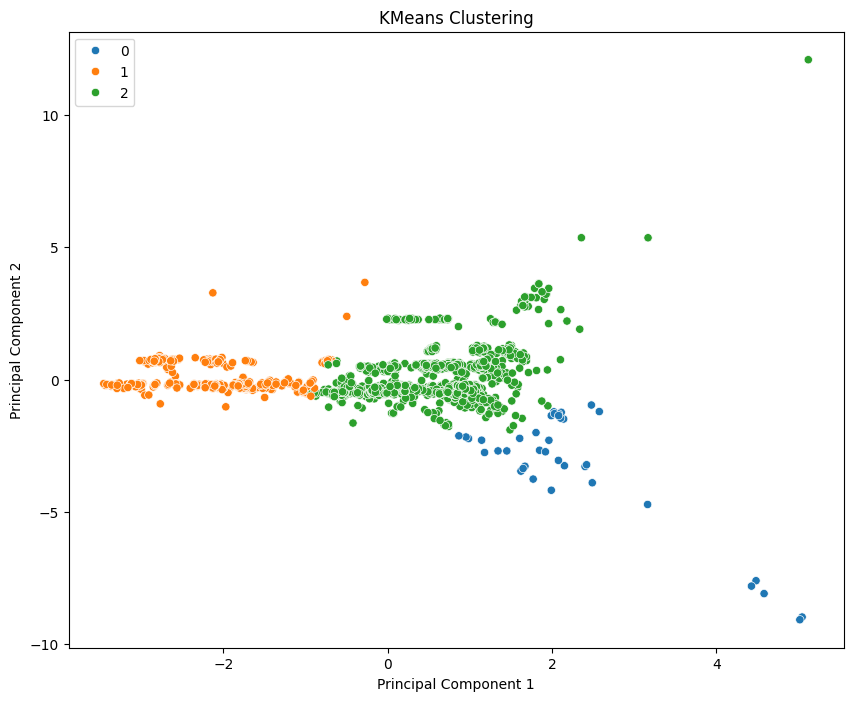

In [99]:
# Fit KMeans clustering algorithm
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_kmeans = kmeans.fit_predict(X_scaled)


# Visualize clusters on a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=clusters_kmeans, palette='tab10', legend='full')
plt.title('KMeans Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


Principal Component Analysis (PCA) is a dimensionality reduction technique that transforms the original features of a dataset into a new set of orthogonal (uncorrelated) variables called principal components. The first principal component (PC1) here captures the direction of maximum variance in the data, and the second principal component (PC2) captures the direction of the second highest variance.

When we perform PCA, we obtain principal components that are linear combinations of the original features. Each principal component is a new variable that represents a different combination of the original features, and they are ordered by the amount of variance they explain in the data.

In the context of clustering visualization, we often use PCA to reduce the dimensionality of the data to 2 or 3 dimensions so that we can visualize the clusters in a scatter plot. PC1 and PC2 represent the first and second principal components, respectively, of the dataset after PCA transformation. These components retain most of the variance in the data while reducing the number of dimensions, allowing us to visualize the data in a 2D space.





